# Predicting the Oil, Gas and Water Production using Machine Learning

In this notebook, I'm going to develop a machine learning project with the goal of predicting the oil, gas, and water production

## 1. Problem Definition

> How well can I predict the future production performance of oil, gas, and water production, based on historical records and by analyzing past production data?

## 2. Data

The production data provided is a DSEATS conceptual oil field with historical production information such as Well Code, Field Name, Downhole Pressure, Tubing Head Pressure, Choke Size et cetera

The two given data files:

* dseats_2024_training_datase.csv

* dseats_2024_validation_datase.csv


## 3. Evaluation

The predictive model’s accuracy and performance would be evaluated with key performance indicators such as RMSE, R2, MAE et cetera.

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, my goal for this project will be to build a machine learning model which minimizes RMSE, R2, MAE et cetera

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Import training set
df = pd.read_csv("data/dseats_2024_training_dataset.csv")

In [3]:
# Checking for Null values
df.isna().sum()

PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       6
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
dtype: int64

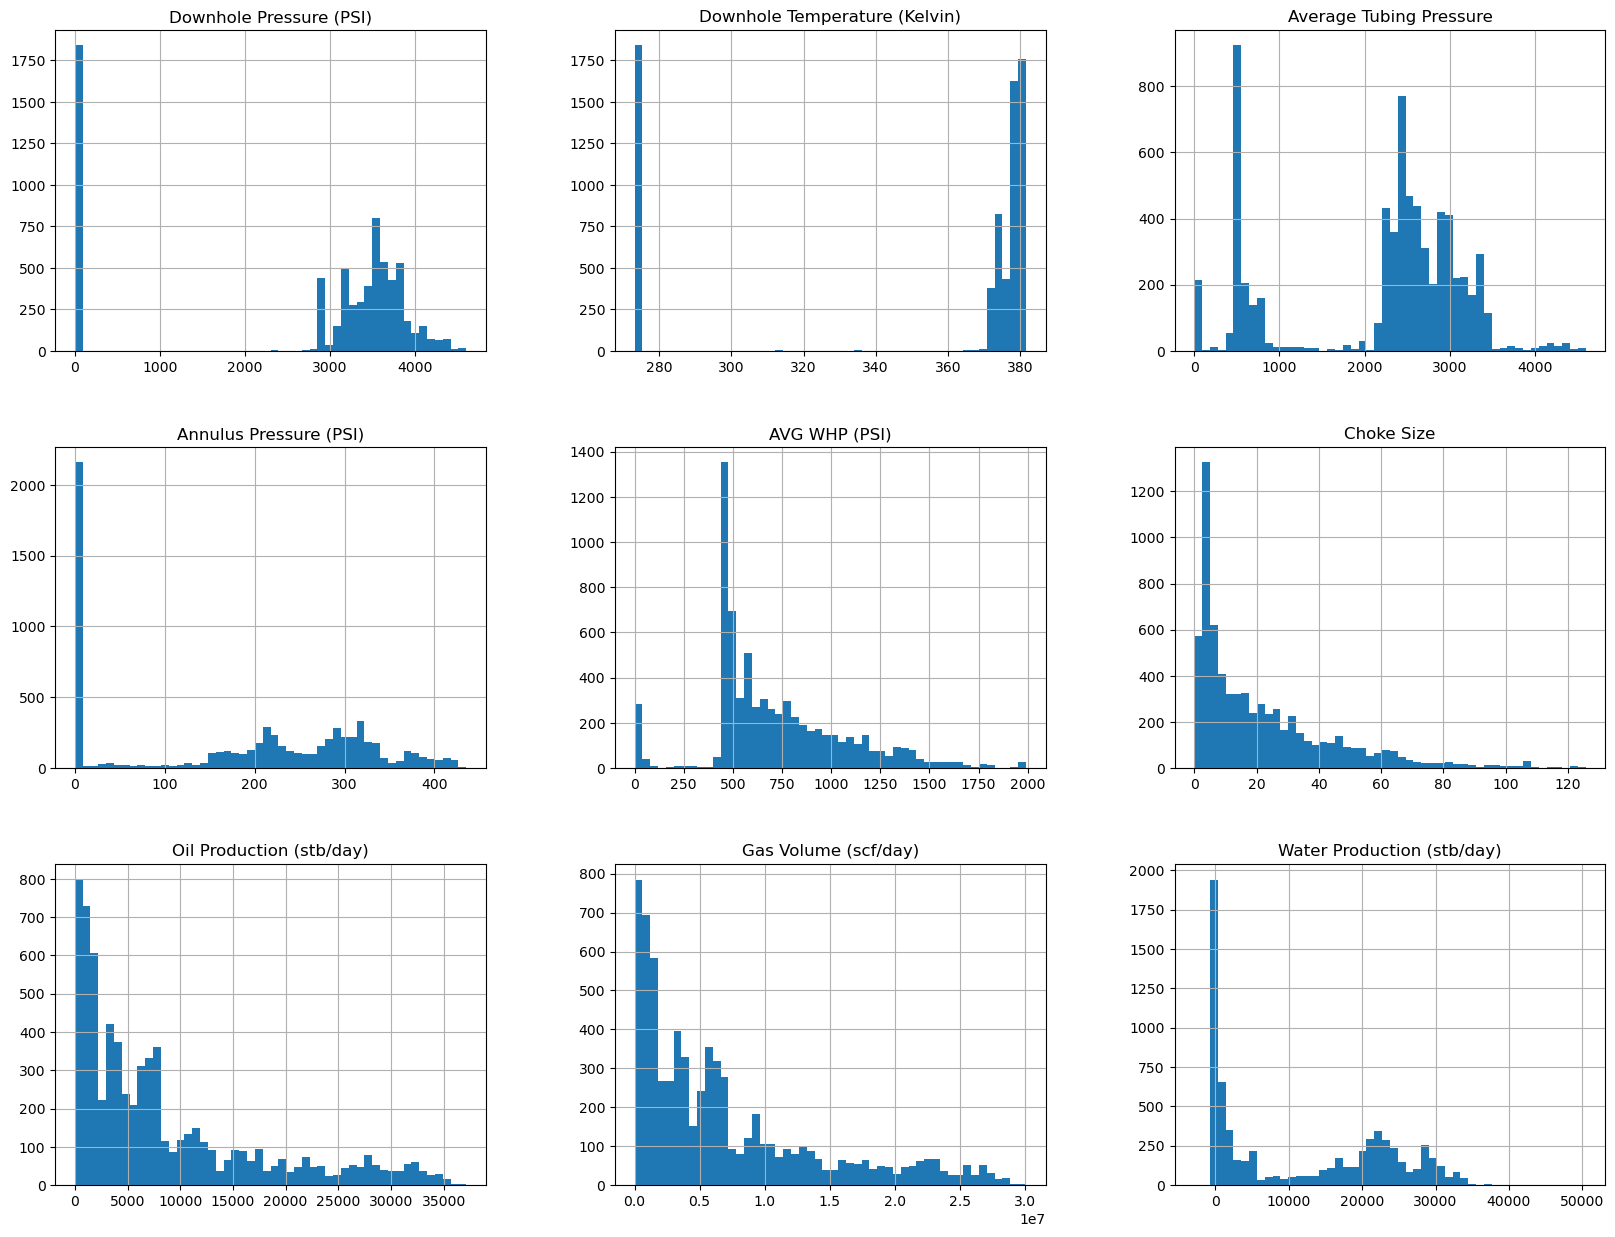

In [4]:
columns_to_plot = ['Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)', 'Average Tubing Pressure', 
                   'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size', 'Oil Production (stb/day)', 
                   'Gas Volume (scf/day)', 'Water Production (stb/day)']

df[columns_to_plot].hist(bins=50, figsize=(20, 15))
plt.show()

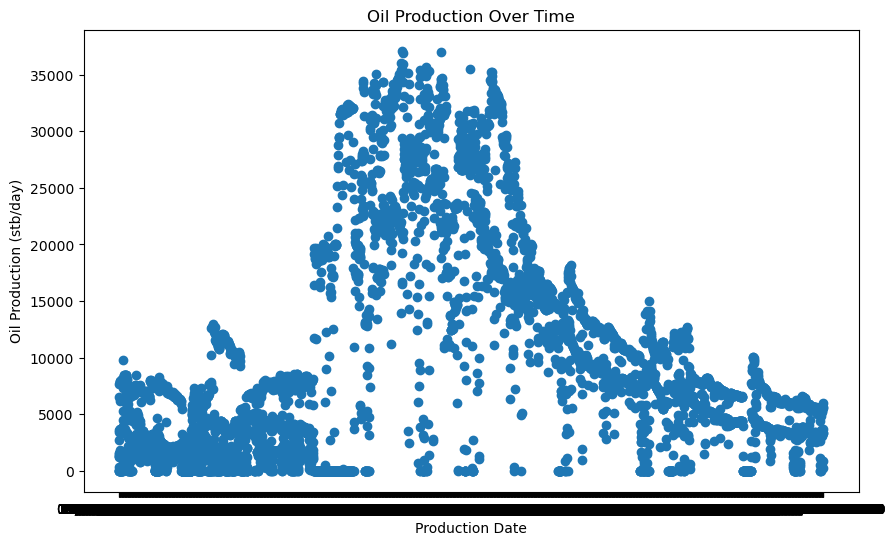

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df["PRODUCTION DATE"], df["Oil Production (stb/day)"])

ax.set_xlabel('Production Date')
ax.set_ylabel('Oil Production (stb/day)')
ax.set_title('Oil Production Over Time')

plt.show()

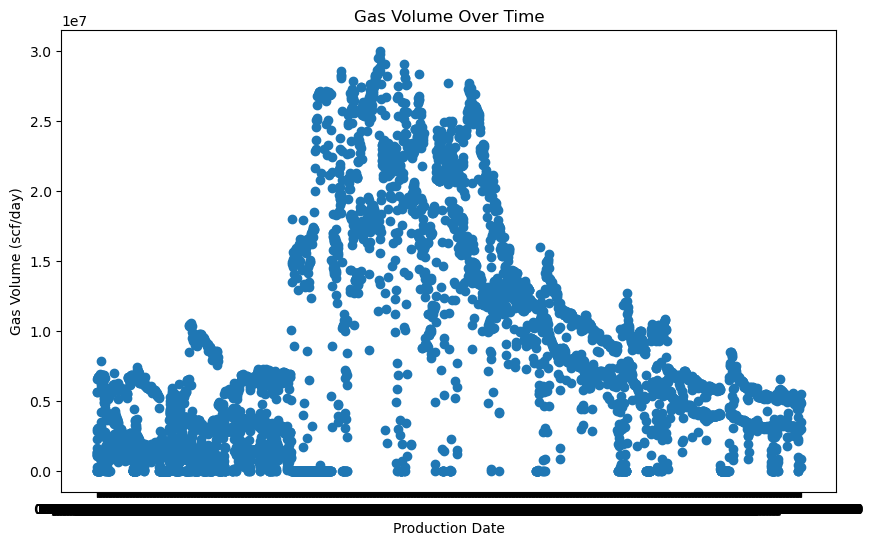

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df["PRODUCTION DATE"], df["Gas Volume (scf/day)"])

ax.set_xlabel('Production Date')
ax.set_ylabel('Gas Volume (scf/day)')
ax.set_title('Gas Volume Over Time')

plt.show()

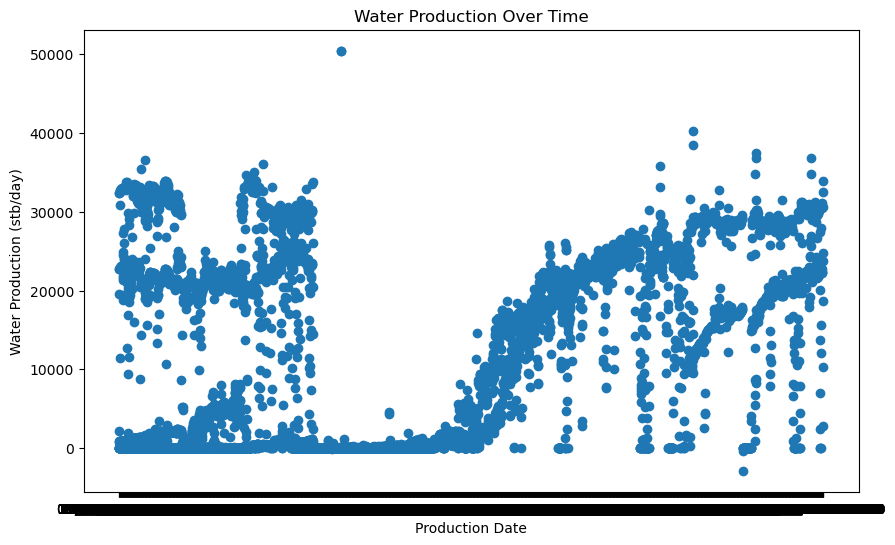

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df["PRODUCTION DATE"], df["Water Production (stb/day)"])

ax.set_xlabel('Production Date')
ax.set_ylabel('Water Production (stb/day)')
ax.set_title('Water Production Over Time')

plt.show()

In [8]:
df['PRODUCTION DATE']

0       07/04/2014 00:00
1       08/04/2014 00:00
2       09/04/2014 00:00
3       10/04/2014 00:00
4       11/04/2014 00:00
              ...       
6920    26/06/2015 00:00
6921    27/06/2015 00:00
6922    28/06/2015 00:00
6923    29/06/2015 00:00
6924    30/06/2015 00:00
Name: PRODUCTION DATE, Length: 6925, dtype: object

### Parsing dates

I want to enrich the time & date component as much as possible.

I can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [9]:
df['PRODUCTION DATE']

0       07/04/2014 00:00
1       08/04/2014 00:00
2       09/04/2014 00:00
3       10/04/2014 00:00
4       11/04/2014 00:00
              ...       
6920    26/06/2015 00:00
6921    27/06/2015 00:00
6922    28/06/2015 00:00
6923    29/06/2015 00:00
6924    30/06/2015 00:00
Name: PRODUCTION DATE, Length: 6925, dtype: object

In [10]:
# Import training data again but this time parse dates
df = pd.read_csv("data/dseats_2024_training_dataset.csv", parse_dates=["PRODUCTION DATE"], dayfirst=True)

In [11]:
df['PRODUCTION DATE']

0      2014-04-07
1      2014-04-08
2      2014-04-09
3      2014-04-10
4      2014-04-11
          ...    
6920   2015-06-26
6921   2015-06-27
6922   2015-06-28
6923   2015-06-29
6924   2015-06-30
Name: PRODUCTION DATE, Length: 6925, dtype: datetime64[ns]

In [12]:
df['PRODUCTION DATE'].dtype

dtype('<M8[ns]')

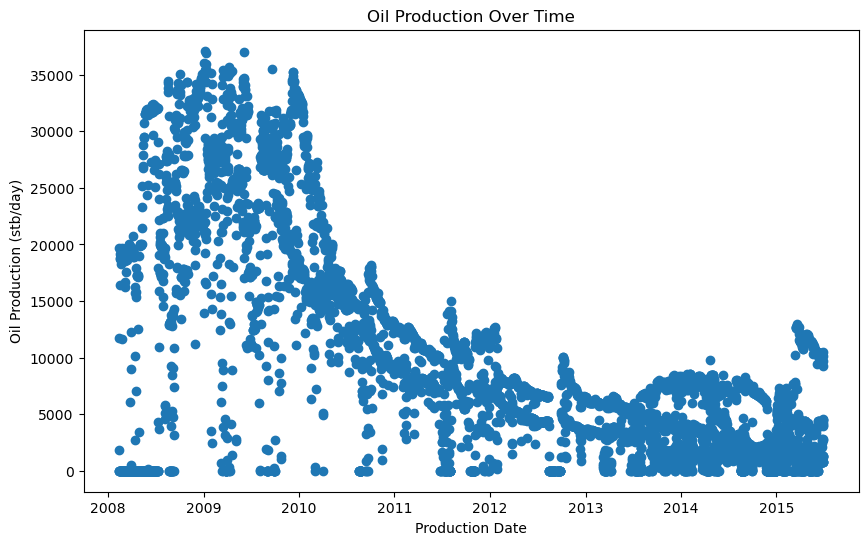

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df["PRODUCTION DATE"], df["Oil Production (stb/day)"])

ax.set_xlabel('Production Date')
ax.set_ylabel('Oil Production (stb/day)')
ax.set_title('Oil Production Over Time')

plt.show()

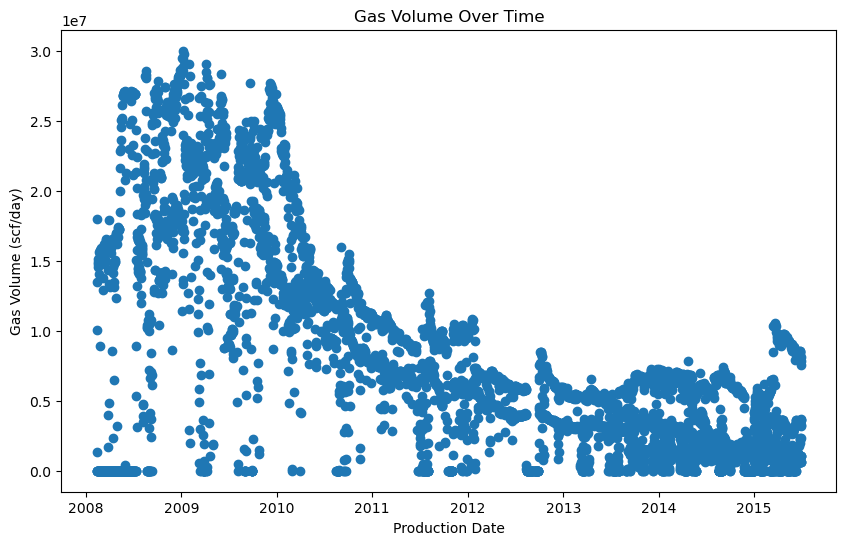

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df["PRODUCTION DATE"], df["Gas Volume (scf/day)"])

ax.set_xlabel('Production Date')
ax.set_ylabel('Gas Volume (scf/day)')
ax.set_title('Gas Volume Over Time')

plt.show()

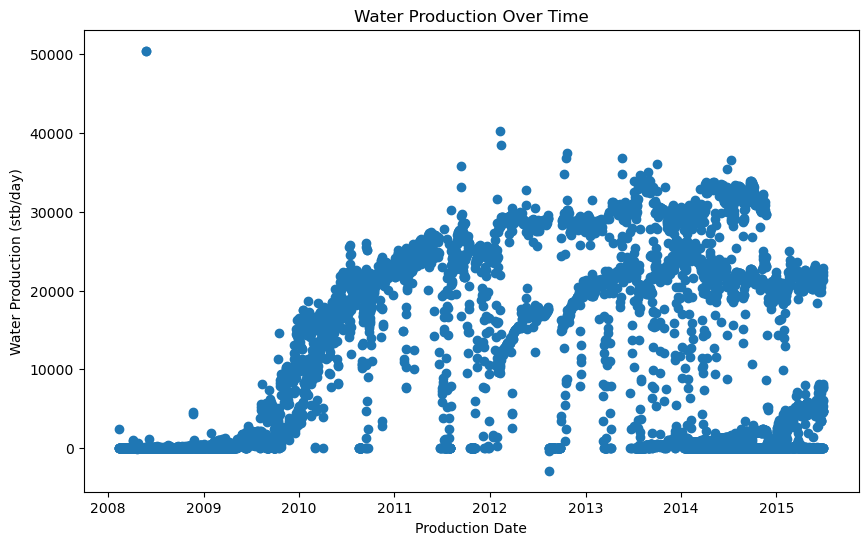

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df["PRODUCTION DATE"], df["Water Production (stb/day)"])

ax.set_xlabel('Production Date')
ax.set_ylabel('Water Production (stb/day)')
ax.set_title('Water Production Over Time')

plt.show()

# Remove Outliers

In [16]:
# Define a threshold to identify outliers
threshold =  df["Water Production (stb/day)"].quantile(0.99)  

# Filter out the outliers
df_filtered = df[df["Water Production (stb/day)"] <= threshold]

threshold

33198.8716

In [17]:
# Calculate the median
median_value = df["Water Production (stb/day)"].median()

# Replace outliers with the median value
df["Water Production (stb/day)"] = np.where(df["Water Production (stb/day)"] > threshold, 
                                                median_value, 
                                                df["Water Production (stb/day)"])

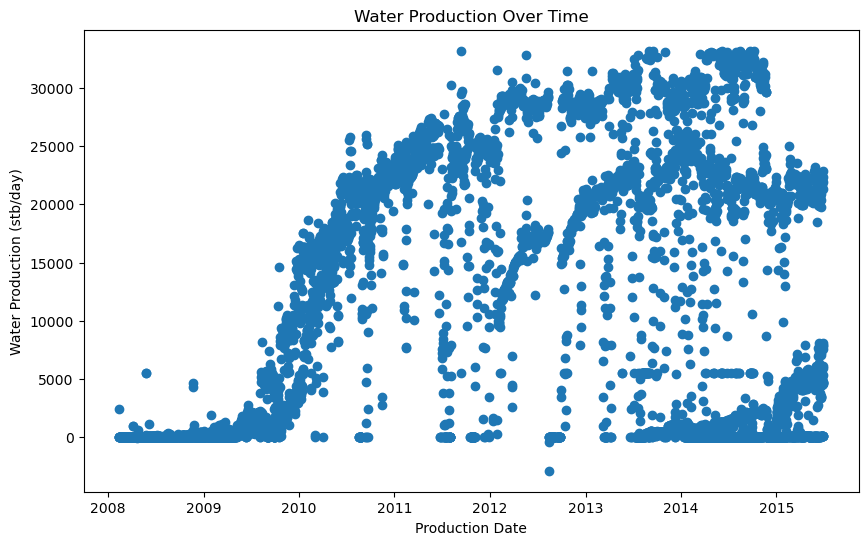

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df["PRODUCTION DATE"], df["Water Production (stb/day)"])

ax.set_xlabel('Production Date')
ax.set_ylabel('Water Production (stb/day)')
ax.set_title('Water Production Over Time')

plt.show()

### Make a copy of the original DataFrame

I want to make a copy of the original dataframe so when I manipulate the copy, I still have my original data.

In [19]:
# Make training copy
df_tmp = df.copy()

### Add datetime parameters for `PRODUCTION DATE` column

In [20]:
df_tmp["productionYear"] = df_tmp["PRODUCTION DATE"].dt.year
df_tmp["productionMonth"] = df_tmp["PRODUCTION DATE"].dt.month
df_tmp["productionDay"] = df_tmp["PRODUCTION DATE"].dt.day
df_tmp["productionDayOfWeek"] = df_tmp["PRODUCTION DATE"].dt.dayofweek
df_tmp["productionDayOfYear"] = df_tmp["PRODUCTION DATE"].dt.dayofyear

In [21]:
df_tmp.head().T

,0,1,2,3,4
PRODUCTION DATE,2014-04-07 00:00:00,2014-04-08 00:00:00,2014-04-09 00:00:00,2014-04-10 00:00:00,2014-04-11 00:00:00
Field Name,DSEAT,DSEAT,DSEAT,DSEAT,DSEAT
WELL_BORE_CODE,DSEAT-001-F-1 C,DSEAT-001-F-1 C,DSEAT-001-F-1 C,DSEAT-001-F-1 C,DSEAT-001-F-1 C
N_WELL_BORE_CODE,105,105,105,105,105
WellBore Name,001-F-1 C,001-F-1 C,001-F-1 C,001-F-1 C,001-F-1 C
FLOW_KIND,production,production,production,production,production
WELL_TYPE,OP,OP,OP,OP,OP
Downhole Pressure (PSI),0.0,0.0,0.0,0.0,4500.45403
Downhole Temperature (Kelvin),273.15,273.15,273.15,273.15,370.02589
Average Tubing Pressure,0.0,0.0,0.0,0.0,4020.53477


In [22]:
# Now we've enriched our DataFrame with date time features, we can remove `PRODUCTION DATE`
df_tmp.drop("PRODUCTION DATE", axis=1, inplace=True)

In [23]:
len(df_tmp)

6925

## Modelling

I'm done with EDA (Exploratory Data Analysis), now I'm going to start Modelling

In [24]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6925 entries, 0 to 6924
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Field Name                     6925 non-null   object 
 1   WELL_BORE_CODE                 6925 non-null   object 
 2   N_WELL_BORE_CODE               6925 non-null   int64  
 3   WellBore Name                  6925 non-null   object 
 4   FLOW_KIND                      6925 non-null   object 
 5   WELL_TYPE                      6925 non-null   object 
 6   Downhole Pressure (PSI)        6925 non-null   float64
 7   Downhole Temperature (Kelvin)  6925 non-null   float64
 8   Average Tubing Pressure        6925 non-null   float64
 9   Annulus Pressure (PSI)         6925 non-null   float64
 10  AVG WHP (PSI)                  6925 non-null   float64
 11  Choke Size                     6919 non-null   float64
 12  Oil Production (stb/day)       6925 non-null   f

### Convert string to categories

One way I can turn all of my data into numbers is by converting them into pandas categories.

In [25]:
df_tmp.head().T

,0,1,2,3,4
Field Name,DSEAT,DSEAT,DSEAT,DSEAT,DSEAT
WELL_BORE_CODE,DSEAT-001-F-1 C,DSEAT-001-F-1 C,DSEAT-001-F-1 C,DSEAT-001-F-1 C,DSEAT-001-F-1 C
N_WELL_BORE_CODE,105,105,105,105,105
WellBore Name,001-F-1 C,001-F-1 C,001-F-1 C,001-F-1 C,001-F-1 C
FLOW_KIND,production,production,production,production,production
WELL_TYPE,OP,OP,OP,OP,OP
Downhole Pressure (PSI),0.0,0.0,0.0,0.0,4500.45403
Downhole Temperature (Kelvin),273.15,273.15,273.15,273.15,370.02589
Average Tubing Pressure,0.0,0.0,0.0,0.0,4020.53477
Annulus Pressure (PSI),0.0,0.0,0.0,0.0,0.0


In [26]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Field Name
WELL_BORE_CODE
WellBore Name
FLOW_KIND
WELL_TYPE


In [27]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [28]:
df_tmp['WellBore Name'].cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
6920    4
6921    4
6922    4
6923    4
6924    4
Length: 6925, dtype: int8

In [29]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6925 entries, 0 to 6924
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Field Name                     6925 non-null   category
 1   WELL_BORE_CODE                 6925 non-null   category
 2   N_WELL_BORE_CODE               6925 non-null   int64   
 3   WellBore Name                  6925 non-null   category
 4   FLOW_KIND                      6925 non-null   category
 5   WELL_TYPE                      6925 non-null   category
 6   Downhole Pressure (PSI)        6925 non-null   float64 
 7   Downhole Temperature (Kelvin)  6925 non-null   float64 
 8   Average Tubing Pressure        6925 non-null   float64 
 9   Annulus Pressure (PSI)         6925 non-null   float64 
 10  AVG WHP (PSI)                  6925 non-null   float64 
 11  Choke Size                     6919 non-null   float64 
 12  Oil Production (stb/day)       692

Thanks to pandas Categories I now have a way to access all of the data in the form of numbers.

But I still have a bunch of missing data...

In [30]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

Field Name                       0.000000
WELL_BORE_CODE                   0.000000
N_WELL_BORE_CODE                 0.000000
WellBore Name                    0.000000
FLOW_KIND                        0.000000
WELL_TYPE                        0.000000
Downhole Pressure (PSI)          0.000000
Downhole Temperature (Kelvin)    0.000000
Average Tubing Pressure          0.000000
Annulus Pressure (PSI)           0.000000
AVG WHP (PSI)                    0.000000
Choke Size                       0.000866
Oil Production (stb/day)         0.000000
Gas Volume (scf/day)             0.000000
Water Production (stb/day)       0.000000
productionYear                   0.000000
productionMonth                  0.000000
productionDay                    0.000000
productionDayOfWeek              0.000000
productionDayOfYear              0.000000
dtype: float64

In [31]:
df_tmp.isna().sum()

Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       6
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
productionYear                   0
productionMonth                  0
productionDay                    0
productionDayOfWeek              0
productionDayOfYear              0
dtype: int64

## Fill missing values

### Fill numerical missing values

In [32]:
# Check for which columns have numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

N_WELL_BORE_CODE
Downhole Pressure (PSI)
Downhole Temperature (Kelvin)
Average Tubing Pressure
Annulus Pressure (PSI)
AVG WHP (PSI)
Choke Size
Oil Production (stb/day)
Gas Volume (scf/day)
Water Production (stb/day)
productionYear
productionMonth
productionDay
productionDayOfWeek
productionDayOfYear


In [33]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Choke Size


In [34]:
# Identify rows with any missing values
missing_rows = df[df.isnull().any(axis=1)]

# Get the indices of those rows
missing_indices = missing_rows.index

missing_indices

Index([452, 454, 465, 468, 469, 472], dtype='int64')

In [35]:
# Fill the numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data is missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [36]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [37]:
df_tmp.isna().sum()

Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       0
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
productionYear                   0
productionMonth                  0
productionDay                    0
productionDayOfWeek              0
productionDayOfYear              0
Choke Size_is_missing            0
dtype: int64

Now that all the data is numeric as well as the dataframe has no missing values, I should be able to build a machine learning model

### Filling and turning categorical variables into numbers

In [38]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Field Name
WELL_BORE_CODE
WellBore Name
FLOW_KIND
WELL_TYPE


In [39]:
# Turn categorical variables into numbers and fill missing 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [40]:
pd.Categorical(df_tmp["WELL_BORE_CODE"]).codes

array([0, 0, 0, ..., 4, 4, 4], dtype=int8)

In [41]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6925 entries, 0 to 6924
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Field Name                     6925 non-null   int8   
 1   WELL_BORE_CODE                 6925 non-null   int8   
 2   N_WELL_BORE_CODE               6925 non-null   int64  
 3   WellBore Name                  6925 non-null   int8   
 4   FLOW_KIND                      6925 non-null   int8   
 5   WELL_TYPE                      6925 non-null   int8   
 6   Downhole Pressure (PSI)        6925 non-null   float64
 7   Downhole Temperature (Kelvin)  6925 non-null   float64
 8   Average Tubing Pressure        6925 non-null   float64
 9   Annulus Pressure (PSI)         6925 non-null   float64
 10  AVG WHP (PSI)                  6925 non-null   float64
 11  Choke Size                     6925 non-null   float64
 12  Oil Production (stb/day)       6925 non-null   f

In [42]:
df_tmp.head().T

,0,1,2,3,4
Field Name,1,1,1,1,1
WELL_BORE_CODE,1,1,1,1,1
N_WELL_BORE_CODE,105,105,105,105,105
WellBore Name,1,1,1,1,1
FLOW_KIND,1,1,1,1,1
WELL_TYPE,1,1,1,1,1
Downhole Pressure (PSI),0.0,0.0,0.0,0.0,4500.45403
Downhole Temperature (Kelvin),273.15,273.15,273.15,273.15,370.02589
Average Tubing Pressure,0.0,0.0,0.0,0.0,4020.53477
Annulus Pressure (PSI),0.0,0.0,0.0,0.0,0.0


## Correlation Check

In [43]:
columns = ["Field Name_is_missing", "WELL_BORE_CODE_is_missing", "WellBore Name_is_missing", "FLOW_KIND_is_missing", "WELL_TYPE_is_missing", "Field Name", "FLOW_KIND"]

df_tmp_drop = df_tmp.drop(columns, axis=1)

<Axes: >

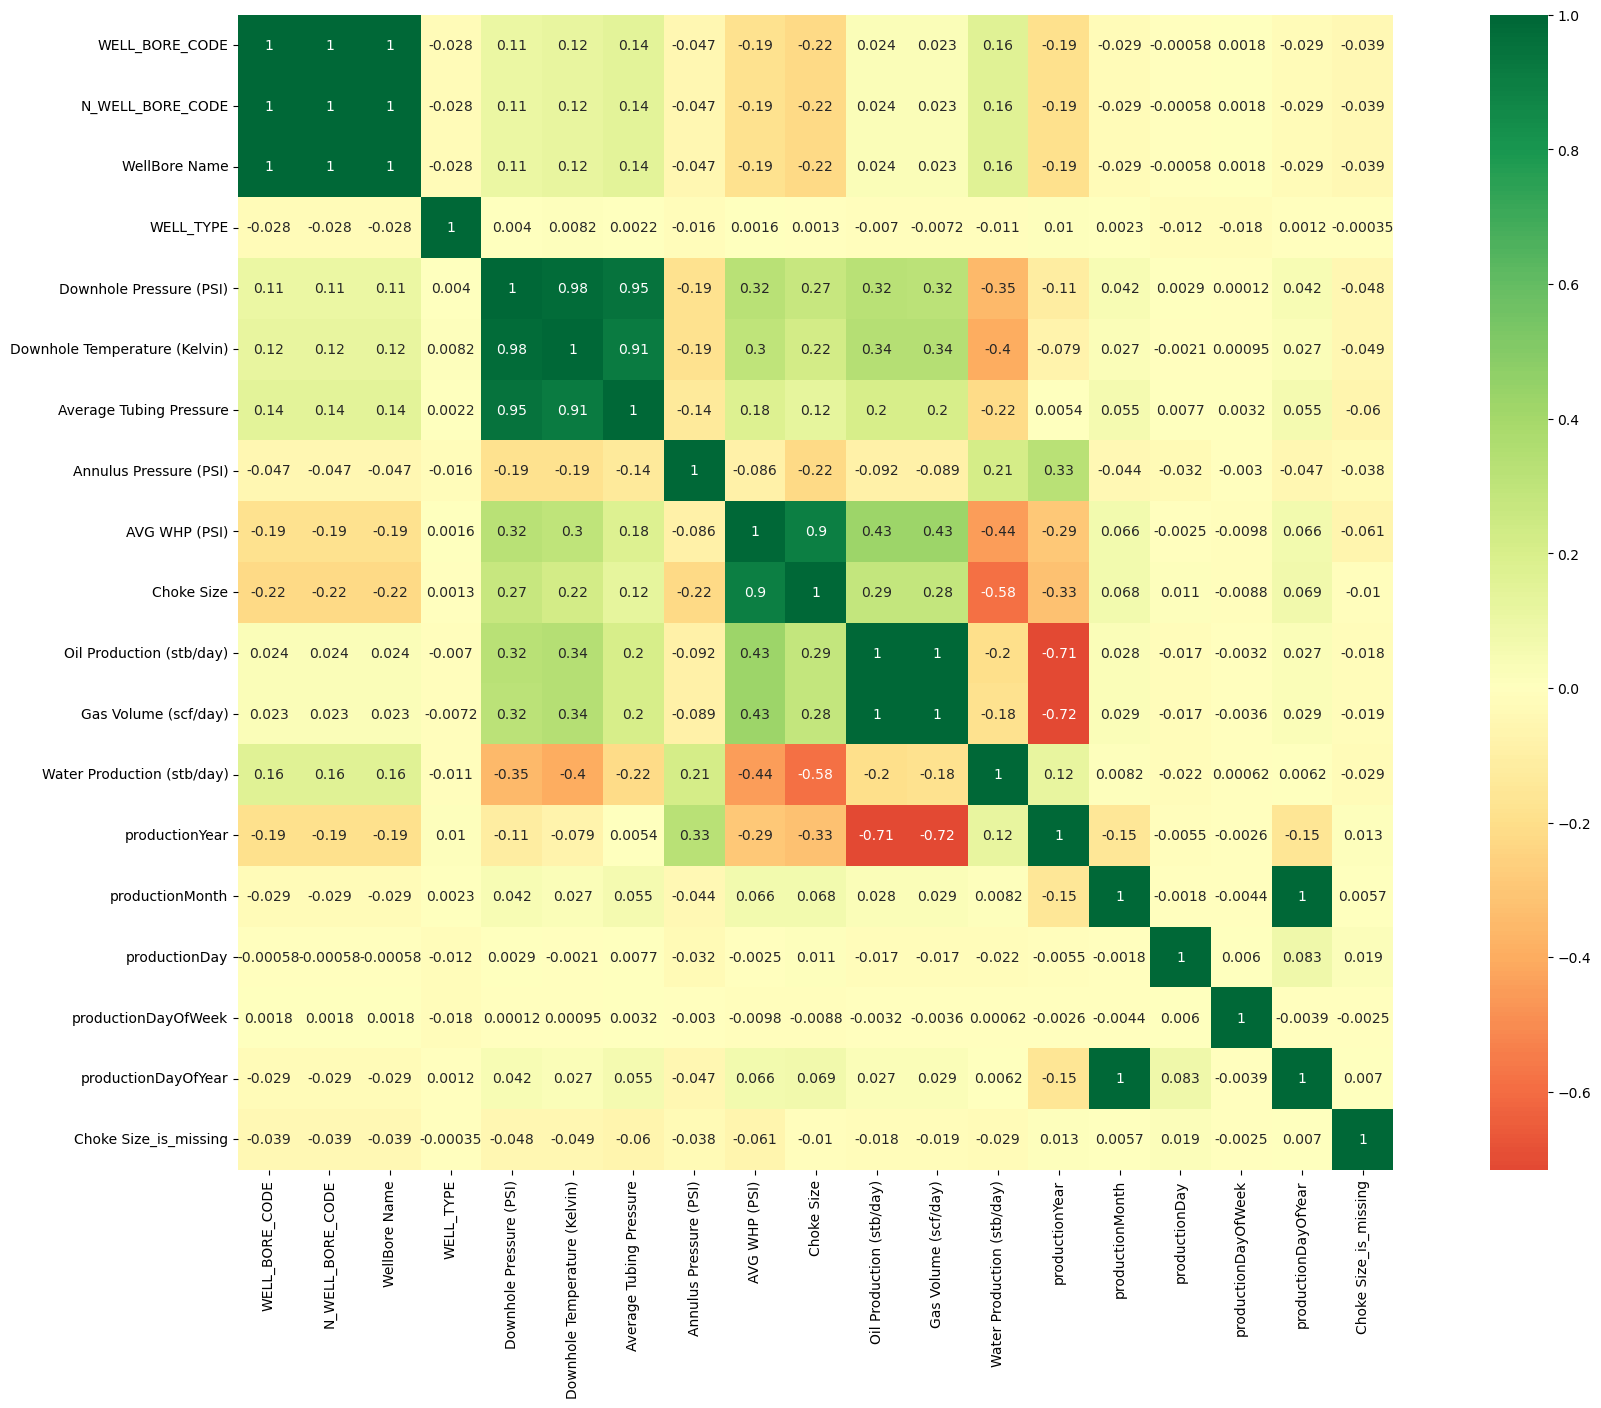

In [44]:
plt.figure(figsize=(25,15))
sns.heatmap(df_tmp_drop.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

## Splitting data into training/validation sets

In [45]:
target_columns = ["Oil Production (stb/day)", "Gas Volume (scf/day)", "Water Production (stb/day)"]

# Split data into X & y
X = df_tmp.drop(target_columns, axis=1)
y = df_tmp[target_columns]

# Perform an 80-20 split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape


((5540, 23), (5540, 3), (1385, 23), (1385, 3))

### Building an evaluation function

In [46]:
# Create evaluation function (RMSLE)
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSE": root_mean_squared_error(y_train, train_preds),
              "Valid RMSE": root_mean_squared_error(y_valid, val_preds),
              "Training MSE": mean_squared_error(y_train, train_preds),
              "Valid MSE": mean_squared_error(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing our model(to tune the hyperparameters)

In [47]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                               random_state=42)

model.fit(X_train, y_train)

CPU times: total: 10.8 s
Wall time: 3.09 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [48]:
show_scores(model)

{'Training MAE': 64372.953055470425,
 'Valid MAE': 179663.41836539714,
 'Training RMSE': 176491.56476829643,
 'Valid RMSE': 502616.4500012962,
 'Training MSE': 92841781640.2194,
 'Valid MSE': 753348032589.6094,
 'Training R^2': 0.9933704888395694,
 'Valid R^2': 0.9519904075147906}

### Hyperparameter tuning with RandomizedSearchCV

In [49]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {
    "n_estimators": np.arange(120, 130, 10),  
    "max_depth": [12, 14, 16, None],  
    "min_samples_split": np.arange(2, 10, 2),  
    "min_samples_leaf": np.arange(1, 4, 1), 
    "max_features": ['sqrt', 'log2', 0.4, 0.5, 0.6]  
}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True,
                              random_state=42)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 27min 30s
Wall time: 7min 59s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [12, 14, 16, None],
                                        'max_features': ['sqrt', 'log2', 0.4,
                                                         0.5, 0.6],
                                        'min_samples_leaf': array([1, 2, 3]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([120])},
                   random_state=42, verbose=True)

In [50]:
# Find the best model hyperparameters
best_params = rs_model.best_params_
best_params

{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 0.6,
 'max_depth': None}

In [51]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 63256.380178491825,
 'Valid MAE': 180145.86064856566,
 'Training RMSE': 170675.50807371957,
 'Valid RMSE': 494302.5526470275,
 'Training MSE': 86817757244.81825,
 'Valid MSE': 728676035585.3427,
 'Training R^2': 0.9937033635521586,
 'Valid R^2': 0.9541680023851827}

### Train a model with the best hyperparameters

In [52]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=120,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    max_features=0.6,
                                    n_jobs=-1,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)   

CPU times: total: 8 s
Wall time: 2.13 s


RandomForestRegressor(max_features=0.6, n_estimators=120, n_jobs=-1,
                      random_state=42)

In [53]:
# Scores for ideal_model
show_scores(ideal_model)

{'Training MAE': 63256.38017849184,
 'Valid MAE': 180145.86064856572,
 'Training RMSE': 170675.50807371954,
 'Valid RMSE': 494302.5526470276,
 'Training MSE': 86817757244.81824,
 'Valid MSE': 728676035585.3429,
 'Training R^2': 0.9937033635521586,
 'Valid R^2': 0.9541680023851827}

## Make predictions on test data

In [54]:
# Import the test data
df_test = pd.read_csv("data/dseats_2024_validation_dataset.csv", parse_dates=['PRODUCTION DATE'])

df_test.head()

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632,NaN,NaN,NaN
1,2015-07-02,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180,NaN,NaN,NaN
2,2015-07-03,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780,NaN,NaN,NaN
3,2015-07-04,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940,NaN,NaN,NaN
4,2015-07-05,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140,NaN,NaN,NaN


In [55]:
# Drop the target columns
columns_to_drop = ["Oil Production (stb/day)", "Gas Volume (scf/day)", "Water Production (stb/day)"]
df_test = df_test.drop(columns=columns_to_drop)

In [56]:
df_test.head()

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size
0,2015-07-01,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3061.253047,380.665745,2659.809580,0.0,401.443468,0.491632
1,2015-07-02,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3247.951135,376.759980,2547.453670,0.0,700.497465,21.775180
2,2015-07-03,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3333.012485,375.985300,2533.912265,0.0,799.100220,27.638780
3,2015-07-04,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3404.022465,375.419010,2481.804485,0.0,922.217980,36.178940
4,2015-07-05,DSEAT,DSEAT-001-F-1 C,105.0,001-F-1 C,production,OP,3465.473030,375.004710,2408.310945,0.0,1057.162085,45.424140


### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [57]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["productionYear"] = df["PRODUCTION DATE"].dt.year
    df["productionMonth"] = df["PRODUCTION DATE"].dt.month
    df["productionDay"] = df["PRODUCTION DATE"].dt.day
    df["productionDayOfWeek"] = df["PRODUCTION DATE"].dt.dayofweek
    df["productionDayOfYear"] = df["PRODUCTION DATE"].dt.dayofyear

    df.drop("PRODUCTION DATE", axis=1, inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data is missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turned categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate whether sample had missing value
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes + 1
    
    return df

In [58]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),...,Downhole Temperature (Kelvin)_is_missing,Average Tubing Pressure_is_missing,Annulus Pressure (PSI)_is_missing,AVG WHP (PSI)_is_missing,Choke Size_is_missing,productionYear_is_missing,productionMonth_is_missing,productionDay_is_missing,productionDayOfWeek_is_missing,productionDayOfYear_is_missing
0,1,1,105.0,1,1,1,3061.253047,380.665745,2659.809580,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1,105.0,1,1,1,3247.951135,376.759980,2547.453670,0.0,...,False,False,False,False,False,False,False,False,False,False
2,1,1,105.0,1,1,1,3333.012485,375.985300,2533.912265,0.0,...,False,False,False,False,False,False,False,False,False,False
3,1,1,105.0,1,1,1,3404.022465,375.419010,2481.804485,0.0,...,False,False,False,False,False,False,False,False,False,False
4,1,1,105.0,1,1,1,3465.473030,375.004710,2408.310945,0.0,...,False,False,False,False,False,False,False,False,False,False


In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5540 entries, 1480 to 860
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Field Name                     5540 non-null   int8   
 1   WELL_BORE_CODE                 5540 non-null   int8   
 2   N_WELL_BORE_CODE               5540 non-null   int64  
 3   WellBore Name                  5540 non-null   int8   
 4   FLOW_KIND                      5540 non-null   int8   
 5   WELL_TYPE                      5540 non-null   int8   
 6   Downhole Pressure (PSI)        5540 non-null   float64
 7   Downhole Temperature (Kelvin)  5540 non-null   float64
 8   Average Tubing Pressure        5540 non-null   float64
 9   Annulus Pressure (PSI)         5540 non-null   float64
 10  AVG WHP (PSI)                  5540 non-null   float64
 11  Choke Size                     5540 non-null   float64
 12  productionYear                 5540 non-null   int3

In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Field Name                                9920 non-null   int8   
 1   WELL_BORE_CODE                            9920 non-null   int8   
 2   N_WELL_BORE_CODE                          9920 non-null   float64
 3   WellBore Name                             9920 non-null   int8   
 4   FLOW_KIND                                 9920 non-null   int8   
 5   WELL_TYPE                                 9920 non-null   int8   
 6   Downhole Pressure (PSI)                   9920 non-null   float64
 7   Downhole Temperature (Kelvin)             9920 non-null   float64
 8   Average Tubing Pressure                   9920 non-null   float64
 9   Annulus Pressure (PSI)                    9920 non-null   float64
 10  AVG WHP (PSI)                       

In [61]:
# Finding how the columns differ
set(df_test.columns) - set(X_train.columns)

# Make our df_test columns to have the same columns with our X_train
df_test = df_test[X_train.columns]

Now the test dataframe has the same features as the training dataframe, I can make predictions.

In [62]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [63]:
test_preds

array([[1.43922538e+03, 1.19134391e+06, 2.28083472e+03],
       [2.95263083e+02, 2.50691631e+05, 4.77233832e+02],
       [1.19469639e+02, 9.94694696e+04, 3.09975918e+02],
       ...,
       [2.07600140e+03, 1.74943327e+06, 9.09681815e+03],
       [2.07600140e+03, 1.74943327e+06, 9.09681815e+03],
       [2.07600140e+03, 1.74943327e+06, 9.09681815e+03]])

In [64]:
# Format predictions
df_preds = pd.DataFrame(test_preds, columns=["Oil Production (stb/day)", "Gas Volume (scf/day)", "Water Production (stb/day)"])

df_preds

,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,1439.225383,1.191344e+06,2280.834722
1,295.263083,2.506916e+05,477.233832
2,119.469639,9.946947e+04,309.975918
3,29.737548,2.365627e+04,144.911117
4,56.410292,4.851933e+04,3.509296
...,...,...,...
9915,2076.001396,1.749433e+06,9096.818150
9916,2076.001396,1.749433e+06,9096.818150
9917,2076.001396,1.749433e+06,9096.818150
9918,2076.001396,1.749433e+06,9096.818150


In [65]:
# Export prediction data
df_preds.to_csv("data/Samuel_Elema_2024_DSEATS_Datathon_5742059.csv", index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** [Oil Production (stb/day), Gas Volume (scf/day), Water Production (stb/day)].

In [66]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0.        , 0.01363367, 0.01451007, 0.01393699, 0.        ,
       0.        , 0.03688214, 0.13647371, 0.0440149 , 0.03350554,
       0.15126928, 0.04226049, 0.47663403, 0.00847336, 0.0041483 ,
       0.00145749, 0.02280003, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [67]:
X_train.columns

Index(['Field Name', 'WELL_BORE_CODE', 'N_WELL_BORE_CODE', 'WellBore Name',
       'FLOW_KIND', 'WELL_TYPE', 'Downhole Pressure (PSI)',
       'Downhole Temperature (Kelvin)', 'Average Tubing Pressure',
       'Annulus Pressure (PSI)', 'AVG WHP (PSI)', 'Choke Size',
       'productionYear', 'productionMonth', 'productionDay',
       'productionDayOfWeek', 'productionDayOfYear', 'Choke Size_is_missing',
       'Field Name_is_missing', 'WELL_BORE_CODE_is_missing',
       'WellBore Name_is_missing', 'FLOW_KIND_is_missing',
       'WELL_TYPE_is_missing'],
      dtype='object')

In [68]:
# Helper function for plotting feature importance
def plot_features(columns, importance):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importance})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"], df["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

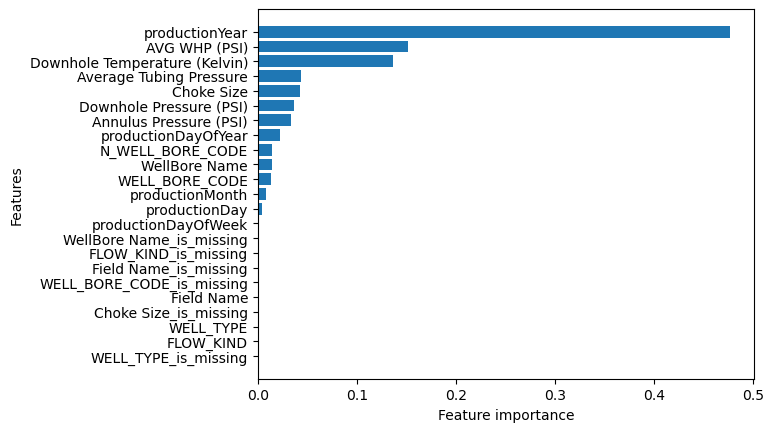

In [69]:
plot_features(X_train.columns, ideal_model.feature_importances_)